    Well Name   Depth  Predicted Facies
0      STUART  2808.0                 2
1      STUART  2808.5                 2
2      STUART  2809.0                 2
3      STUART  2809.5                 2
4      STUART  2810.0                 2
..        ...     ...               ...
825  CRAWFORD  3158.5                 3
826  CRAWFORD  3159.0                 3
827  CRAWFORD  3159.5                 3
828  CRAWFORD  3160.0                 3
829  CRAWFORD  3160.5                 3

[830 rows x 3 columns]
Accuracy on test set: 0.5826893353941267
              precision    recall  f1-score   support

           1       0.75      0.52      0.62        46
           2       0.61      0.73      0.66       153
           3       0.66      0.56      0.61       126
           4       0.29      0.43      0.34        28
           5       0.54      0.28      0.37        47
           6       0.54      0.60      0.57       100
           7       0.62      0.23      0.33        22
           8       0.5

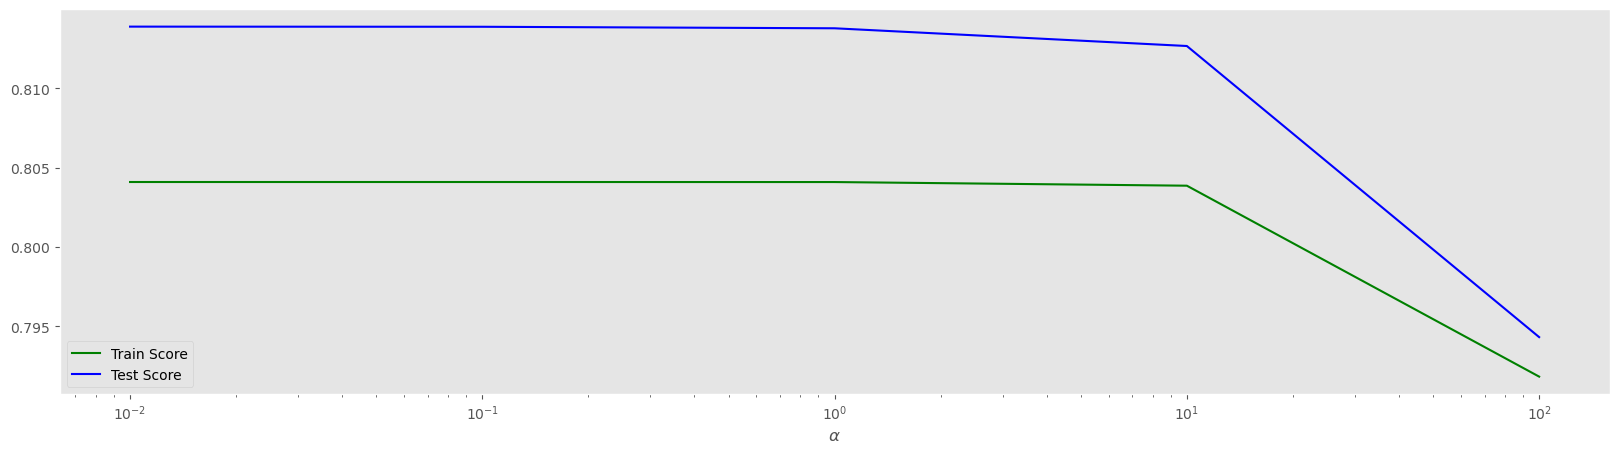

In [14]:
# Import necessary libraries
!pip install scikit-learn

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
from sklearn.linear_model import Ridge
import matplotlib.pyplot as plt

# Load the training and validation data
training_data = pd.read_csv("training_data.csv")
validation_data = pd.read_csv("validation_data_nofacies.csv")

# Separate features and labels
X_train = training_data.drop(columns=['Facies', 'Formation', 'Well Name'])
y_train = training_data['Facies']
X_val = validation_data.drop(columns=['Formation', 'Well Name'])

# Split the training data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Initialize and train the SVM model
svm_model = SVC(kernel='linear', decision_function_shape='ovo', random_state=42)
svm_model.fit(X_train, y_train)

# Predict facies for the validation data
predictions = svm_model.predict(X_val)

# Print the predicted facies for validation data
validation_data['Predicted Facies'] = predictions
print(validation_data[['Well Name', 'Depth', 'Predicted Facies']])

# Evaluate the model
accuracy = accuracy_score(y_test, svm_model.predict(X_test))
print("Accuracy on test set:", accuracy)
print(classification_report(y_test, svm_model.predict(X_test)))

# Loop through different alpha values for Ridge Regression
x_range = [0.01, 0.1, 1, 10, 100]  # Define alpha values
train_score_list = []
test_score_list = []

for alpha in x_range: 
    # Initialize Ridge regression model
    ridge = Ridge(alpha)
    
    # Train the model on the training data
    ridge.fit(X_train,  y_train)
    
    # Calculate and store training score
    train_score_list.append(ridge.score(X_train, y_train))
    
    # Calculate and store test score
    test_score_list.append(ridge.score(X_test, y_test))

# Plotting
plt.subplots(figsize=(20, 5))
plt.plot(x_range, train_score_list, c='g', label='Train Score')
plt.plot(x_range, test_score_list, c='b', label='Test Score')
plt.xscale('log')
plt.legend(loc=3)
plt.xlabel(r'$\alpha$')
plt.grid()
plt.show()



In [15]:
print(train_score_list)
print(test_score_list)

[0.8040995778754314, 0.8040995523209571, 0.8040970230175668, 0.8038673493513099, 0.7918402648568701]
[0.813887830108506, 0.813878453873351, 0.8137828945184585, 0.8126669605391907, 0.7943286342853992]


In [16]:

ridge = Ridge(alpha = 0.01)
ridge.fit(X_train,y_train)
print('Train score: {:.4f}'.format(ridge.score(X_train,y_train)))
print('Test score: {:.4f}'.format(ridge.score(X_test, y_test)))

Train score: 0.8041
Test score: 0.8139


In [17]:
ridge.coef_

array([ 1.15277601e-03, -6.98936439e-03, -3.39272542e-01, -3.21169469e-02,
        4.98598831e-02,  8.93944524e-01,  3.41756919e+00,  2.59737511e-01])

In [18]:
ridge.intercept_

-7.355773059946303

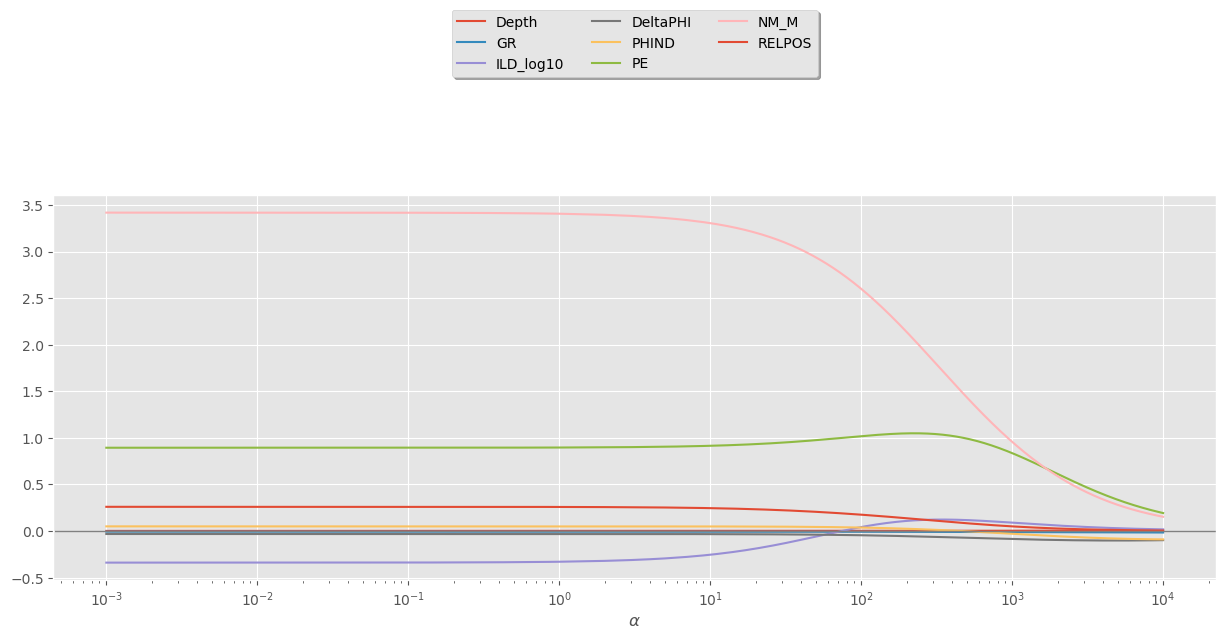

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge

# Assuming you have already defined X_train and y_train

# Define the range of alpha values
x_range1 = np.linspace(0.001, 1, 100).reshape(-1, 1)
x_range2 = np.linspace(1, 10000, 10000).reshape(-1, 1)
x_range = np.append(x_range1, x_range2)

coeff = []

# Loop through different alpha values
for alpha in x_range: 
    # Initialize Ridge regression model
    ridge = Ridge(alpha)
    
    # Train the model on the training data
    ridge.fit(X_train, y_train)
    
    # Store the coefficients
    coeff.append(ridge.coef_)

coeff = np.array(coeff)

plt.subplots(figsize=(15, 5))
# Plot the coefficients for each feature
for i in range(X_train.shape[1]):
    plt.plot(x_range, coeff[:, i], label=X_train.columns[i])

# Add a horizontal line at y=0
plt.axhline(y=0, xmin=0.001, xmax=9999, linewidth=1, c='gray')
plt.xlabel(r'$\alpha$')
plt.xscale('log')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.5), ncol=3, fancybox=True, shadow=True)
plt.show()


In [20]:
from sklearn.linear_model import Lasso
x_range = [0.01, 0.1, 1, 10, 100]
train_score_list = []
test_score_list = []

for alpha in x_range: 
    lasso = Lasso(alpha)
    lasso.fit(X_train,y_train)
    train_score_list.append(lasso.score(X_train,y_train))
    test_score_list.append(lasso.score(X_test, y_test))

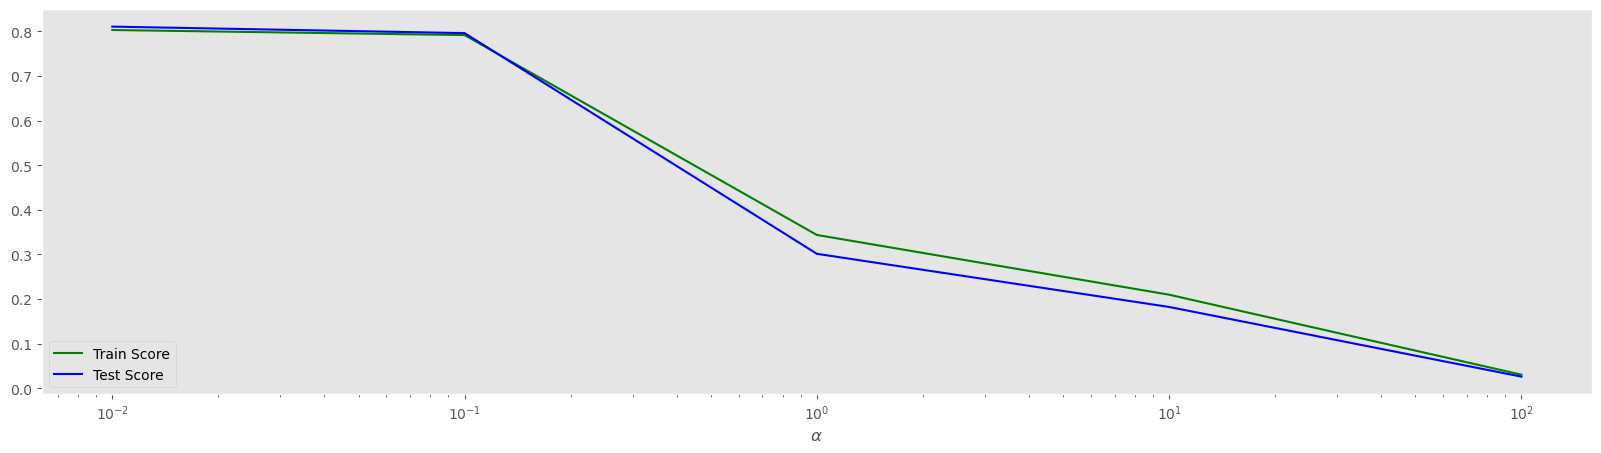

In [21]:
%matplotlib inline
plt.subplots(figsize = (20,5))
plt.plot(x_range, train_score_list, c = 'g', label = 'Train Score')
plt.plot(x_range, test_score_list, c = 'b', label = 'Test Score')
plt.xscale('log')
plt.legend(loc = 3)
plt.xlabel(r'$\alpha$')
plt.grid()

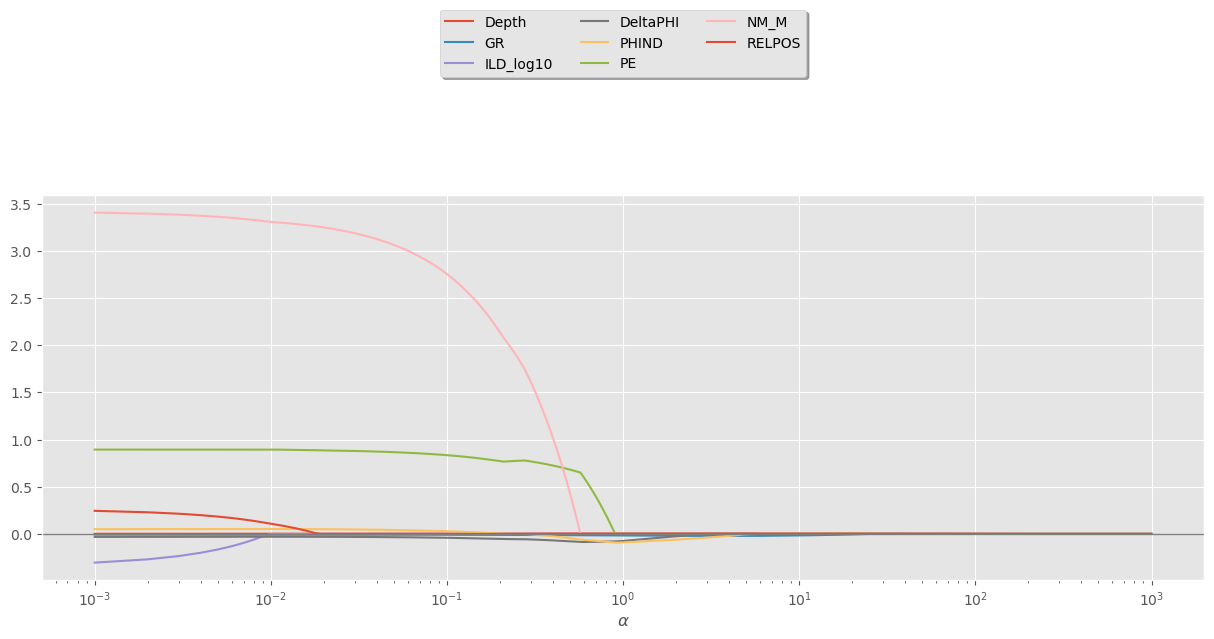

In [22]:
from sklearn.linear_model import Lasso
import numpy as np
import matplotlib.pyplot as plt

# Assuming you have already defined X_train and y_train

# Define the range of alpha values
x_range1 = np.linspace(0.001, 1, 1000).reshape(-1, 1)
x_range2 = np.linspace(1, 1000, 1000).reshape(-1, 1)
x_range = np.append(x_range1, x_range2)

coeff = []

# Loop through different alpha values
for alpha in x_range: 
    # Initialize Lasso regression model
    lasso = Lasso(alpha)
    
    # Train the model on the training data
    lasso.fit(X_train, y_train)
    
    # Store the coefficients
    coeff.append(lasso.coef_)

coeff = np.array(coeff)

plt.subplots(figsize=(15, 5))
# Plot the coefficients for each feature
for i in range(X_train.shape[1]):
    plt.plot(x_range, coeff[:, i], label=X_train.columns[i])

# Add a horizontal line at y=0
plt.axhline(y=0, xmin=0.001, xmax=9999, linewidth=1, c='gray')
plt.xlabel(r'$\alpha$')
plt.xscale('log')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.5), ncol=3, fancybox=True, shadow=True)
plt.show()


In [23]:
from sklearn.linear_model import Lasso
import numpy as np

# Assuming you have already defined X_train and y_train

# Initialize Lasso regression model with alpha = 0.1
lasso = Lasso(alpha=0.1)

# Train the model on the training data
lasso.fit(X_train, y_train)

# Create a dictionary mapping feature names to their coefficients
coefficients = dict(zip(X_train.columns, lasso.coef_))

# Print the coefficients
print("Feature Coefficients:")
for feature, coef in coefficients.items():
    print(f"{feature}: {coef}")


Feature Coefficients:
Depth: 0.0017540344597955623
GR: -0.008697143933277944
ILD_log10: 0.0
DeltaPHI: -0.04120657153065208
PHIND: 0.02867528737054526
PE: 0.8348335474318385
NM_M: 2.75502543540458
RELPOS: 0.0


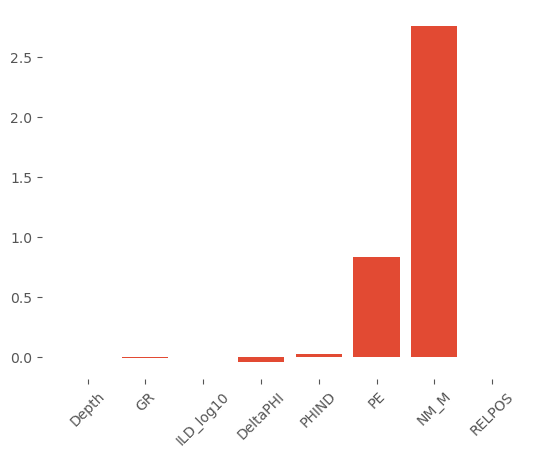

In [24]:
import matplotlib.pyplot as plt

# Assuming you have already defined X_train and lasso.coef_

plt.style.use('ggplot')
plt.bar(range(len(X_train.columns)), lasso.coef_)
plt.box(False)
plt.xticks(range(len(X_train.columns)), X_train.columns, rotation=45)
plt.grid(True)  # Turn on grid
plt.show()


Ratio of positive class in the target: 4.421663442940039


C:\Users\gargi\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


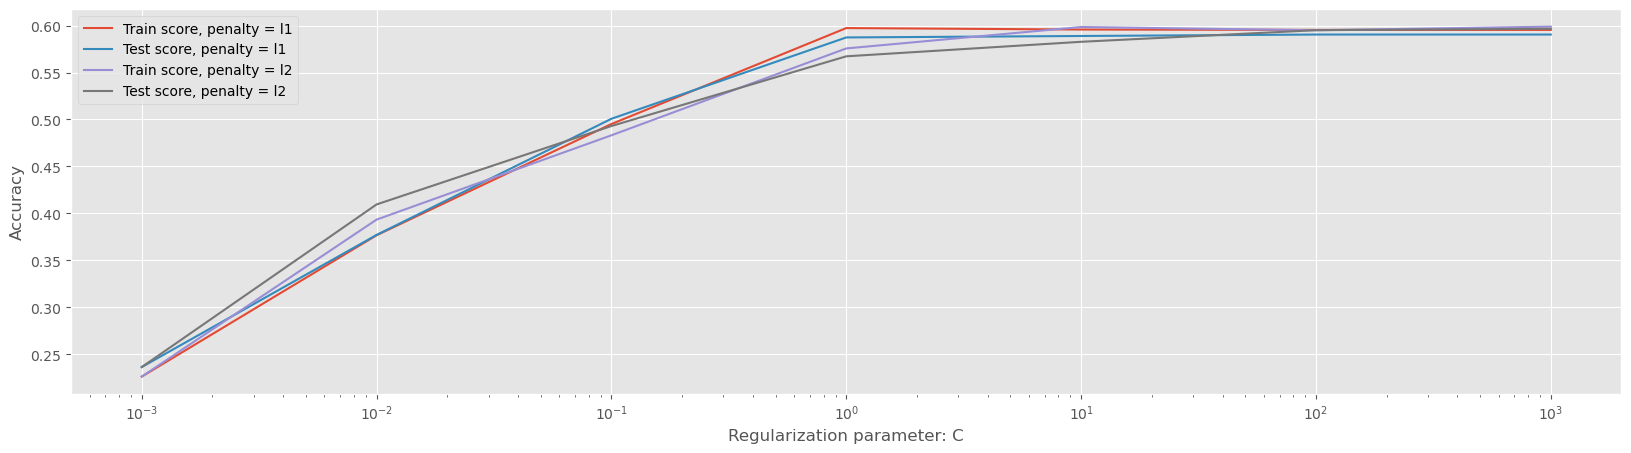

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import pandas as pd

# Load the training and validation data
training_data = pd.read_csv("training_data.csv")
validation_data = pd.read_csv("validation_data_nofacies.csv")

# Separate features and labels
X_train = training_data.drop(columns=['Facies', 'Formation', 'Well Name'])
y_train = training_data['Facies']
X_val = validation_data.drop(columns=['Formation', 'Well Name'])

# Split the training data into train and test sets
X_train_org, X_test_org, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Scale the features using MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train_org)
X_test = scaler.transform(X_test_org)

# Calculate the sum of y divided by its length
y_ratio = y_train.sum() / len(y_train)
print("Ratio of positive class in the target:", y_ratio)

# Define the range of regularization parameter values (C)
c_range = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
train_score_l1 = []
train_score_l2 = []
test_score_l1 = []
test_score_l2 = []

# Loop through different values of regularization parameter (C)
for c in c_range:
    # Initialize Logistic Regression models with L1 and L2 penalties
    log_l1 = LogisticRegression(penalty='l1', C=c, solver='liblinear', max_iter=500)
    log_l2 = LogisticRegression(penalty='l2', C=c, solver='lbfgs', max_iter=500)
    
    # Fit the models on the training data
    log_l1.fit(X_train, y_train)
    log_l2.fit(X_train, y_train)
    
    # Calculate and store training and test scores for L1 penalty
    train_score_l1.append(log_l1.score(X_train, y_train))
    test_score_l1.append(log_l1.score(X_test, y_test))
    
    # Calculate and store training and test scores for L2 penalty
    train_score_l2.append(log_l2.score(X_train, y_train))
    test_score_l2.append(log_l2.score(X_test, y_test))

# Plotting
plt.subplots(figsize=(20, 5))
plt.plot(c_range, train_score_l1, label='Train score, penalty = l1')
plt.plot(c_range, test_score_l1, label='Test score, penalty = l1')
plt.plot(c_range, train_score_l2, label='Train score, penalty = l2')
plt.plot(c_range, test_score_l2, label='Test score, penalty = l2')
plt.legend()
plt.xlabel('Regularization parameter: C')
plt.ylabel('Accuracy')
plt.xscale('log')
plt.show()


In [29]:
X_train.columns()

AttributeError: 'numpy.ndarray' object has no attribute 'columns'

C:\Users\gargi\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\gargi\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\gargi\anaconda3\Lib\site-packages\mlxtend\plotting\decision_regions.py:346: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(


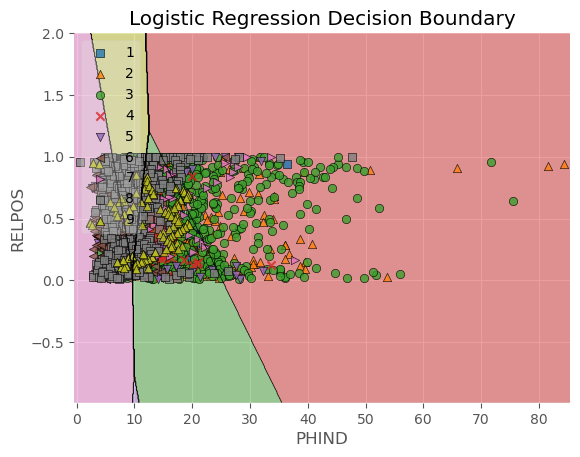

In [30]:
%matplotlib inline
!pip install mlxtend

import pandas as pd
from sklearn.linear_model import LogisticRegression
from mlxtend.plotting import plot_decision_regions

# Load your data
# Assuming you have your training data loaded into a DataFrame named 'training_data'

# Define X and y from your training data
X_train = training_data.drop(columns=['Facies', 'Formation', 'Well Name', 'Depth'])
y_train = training_data['Facies']

# Extract a subset of features for visualization (you can change the indices)
if len(training_data) > 200:  # Check if the DataFrame has at least 200 rows
    X_b = X_train.iloc[200:, [3,6]]
    y_b = y_train.iloc[200:]
else:
    X_b = X_train  # If less than 200 rows, use all features
    y_b = y_train

# Initialize and train your logistic regression model
lreg = LogisticRegression(C=0.1, penalty='l2')
lreg.fit(X_b, y_b)

# Plot decision regions
plot_decision_regions(X_b.values, y_b.values, clf=lreg, legend=2)

# Adding axes annotations
plt.xlabel(X_b.columns[0])
plt.ylabel(X_b.columns[1])
plt.title('Logistic Regression Decision Boundary')
plt.show()


C:\Users\gargi\AppData\Local\Temp\ipykernel_12040\1941026170.py:10: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,2,1)


MemoryError: Unable to allocate 18.3 GiB for an array with shape (2, 1226749400) and data type float64

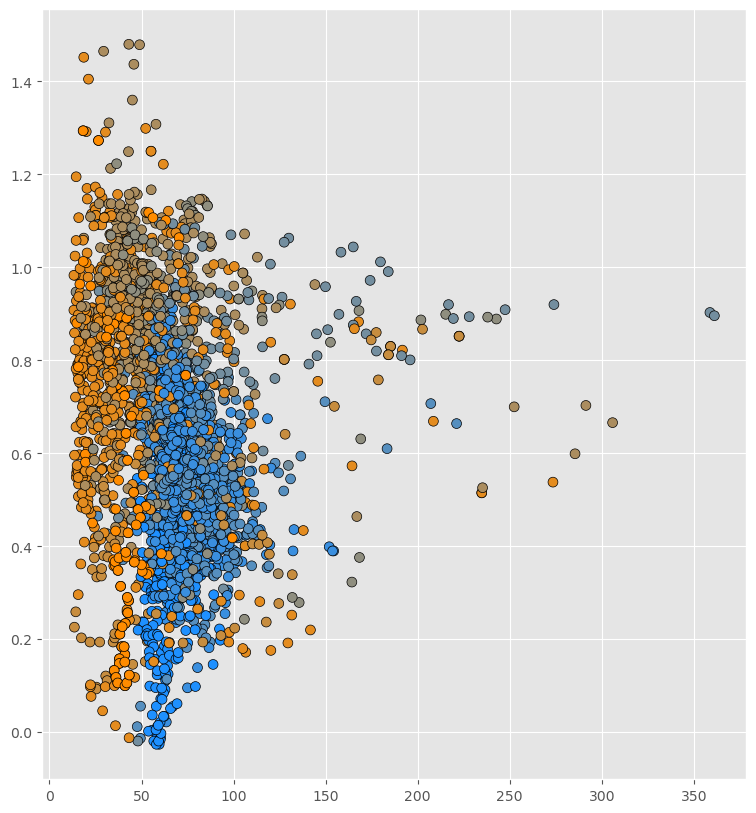

In [31]:
import matplotlib.pyplot as plt
import matplotlib
import numpy as np

# Define a colormap
cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ["dodgerblue", "darkorange"])    

plt.subplots(figsize=(20,10))

plt.subplot(1,2,1)
plt.scatter(X_train['GR'], X_train['ILD_log10'], c=y_train, cmap=cmap, s=50, edgecolor='k') # Replace 'GR' and 'ILD_log10' with appropriate column names
x1_min, x1_max = X_train['GR'].min() - 1, X_train['GR'].max() + 1
x2_min, x2_max = X_train['ILD_log10'].min() - 1, X_train['ILD_log10'].max() + 1
xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, 0.001), np.arange(x2_min, x2_max, 0.001))
Z = lreg.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
Z = Z.reshape(xx1.shape)
plt.contourf(xx1, xx2, Z, levels=1, alpha=0.4, cmap=cmap)
plt.xlim(-0.1, 1)
plt.ylim(-0.1, 1)
plt.xlabel('GR')
plt.ylabel('ILD_log10')
plt.title('Logistic Regression')

plt.subplot(1,2,2)
plt.scatter(X_train['GR'], X_train['ILD_log10'], c=y_train, cmap=cmap, s=50, edgecolor='k') # Replace 'GR' and 'ILD_log10' with appropriate column names
x1_min, x1_max = X_train['GR'].min() - 1, X_train['GR'].max() + 1
x2_min, x2_max = X_train['ILD_log10'].min() - 1, X_train['ILD_log10'].max() + 1
xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, 0.001), np.arange(x2_min, x2_max, 0.001))
Z = lreg.predict_proba(np.array([xx1.ravel(), xx2.ravel()]).T)[:, 1]
Z = Z.reshape(xx1.shape)
Z = np.where(Z <= 0.6, 0, 1)
plt.contourf(xx1, xx2, Z, levels=1, alpha=0.4, cmap=cmap)
plt.xlim(-0.1, 1)
plt.ylim(-0.1, 1)
plt.xlabel('GR')
plt.ylabel('ILD_log10')
plt.title('Logistic Regression with post-processing of results')

plt.show()


In [32]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

# Step 1: Prepare the Data
training_data = pd.read_csv("training_data.csv")
X = training_data[['GR', 'ILD_log10', 'DeltaPHI', 'PHIND', 'PE', 'NM_M', 'RELPOS']]
y = training_data['Facies']

# Step 2: Encode the Target Variable
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Step 3: Split the Data
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Step 4: Train the Model
# Softmax Regression
softmax_reg = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)
softmax_reg.fit(X_train, y_train)

# LinearSVC
linear_svc = LinearSVC()
linear_svc.fit(X_train, y_train)

# Step 5: Evaluate the Model (Optional)
softmax_reg_score = softmax_reg.score(X_test, y_test)
linear_svc_score = linear_svc.score(X_test, y_test)

print("Softmax Regression Accuracy:", softmax_reg_score)
print("LinearSVC Accuracy:", linear_svc_score)


C:\Users\gargi\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\gargi\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


Softmax Regression Accuracy: 0.5765069551777434
LinearSVC Accuracy: 0.5378670788253478


C:\Users\gargi\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


C:\Users\gargi\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\gargi\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\gargi\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\gargi\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X 

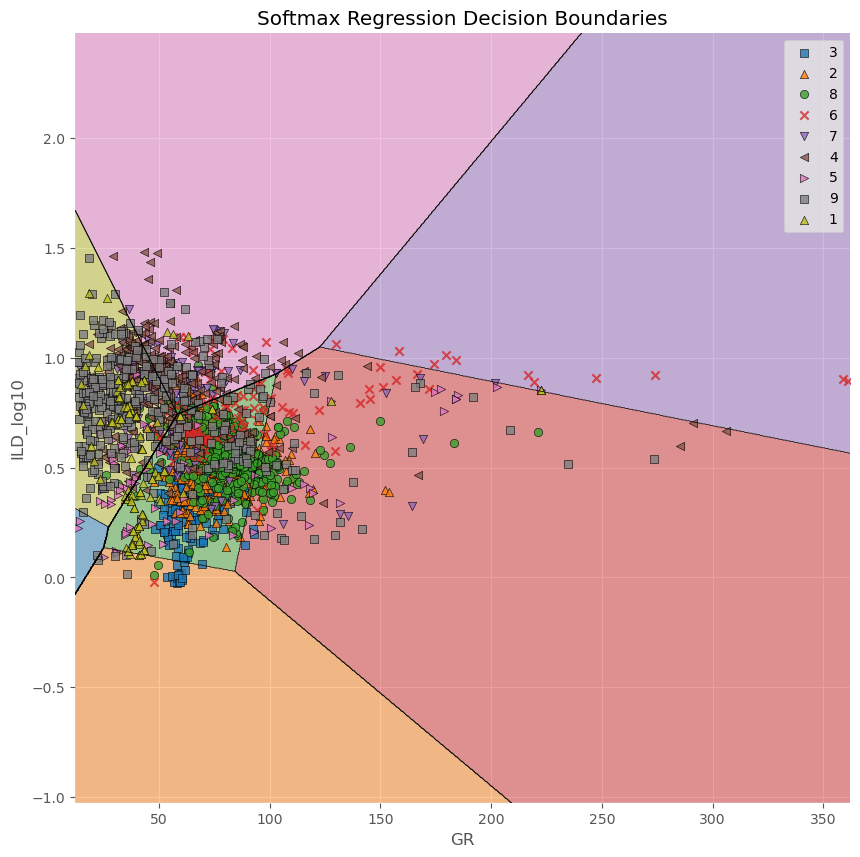

C:\Users\gargi\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearSVC was fitted with feature names
  warnings.warn(
C:\Users\gargi\anaconda3\Lib\site-packages\mlxtend\plotting\decision_regions.py:346: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(


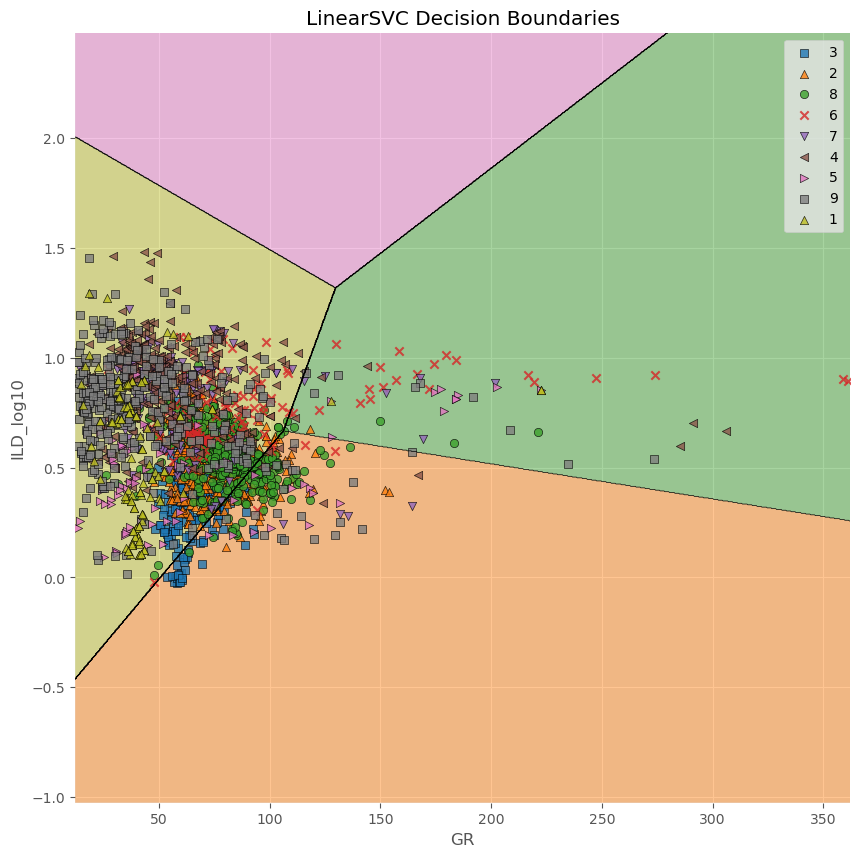

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from mlxtend.plotting import plot_decision_regions

# Step 1: Prepare the Data
training_data = pd.read_csv("training_data.csv")
X = training_data[['GR', 'ILD_log10']]
y = training_data['Facies']

# Step 2: Split the Data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# Step 3: Train the Models
# Softmax Regression
softmax_reg = LogisticRegression(multi_class="multinomial", solver="lbfgs", C=10)
softmax_reg.fit(X_train, y_train)

# LinearSVC
linear_svc = LinearSVC()
linear_svc.fit(X_train, y_train)

# Step 4: Plot Decision Boundaries
# Softmax Regression
fig, ax = plt.subplots(figsize=(10, 10))
plot_decision_regions(X_train.values, y_train.values, clf=softmax_reg, legend=0)
plt.xlabel('GR')
plt.ylabel('ILD_log10')
plt.title('Softmax Regression Decision Boundaries')
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, y.unique())

plt.show()

# LinearSVC
fig, ax = plt.subplots(figsize=(10, 10))
plot_decision_regions(X_train.values, y_train.values, clf=linear_svc, legend=0)
plt.xlabel('GR')
plt.ylabel('ILD_log10')
plt.title('LinearSVC Decision Boundaries')
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, y.unique())

plt.show()


In [ ]:
from sklearn.svm import SVC
from mlxtend.plotting import plot_decision_regions
import matplotlib.gridspec as gridspec
import itertools

# Assuming you have loaded your dataset into X and y
training_data = pd.read_csv("training_data.csv")
X = training_data[['GR', 'ILD_log10']]
y = training_data['Facies']

# Define your classifiers
clf1 = SVC(kernel='poly', degree=3, C=5, coef0=1)
clf2 = SVC(kernel='poly', degree=3, C=5, coef0=0)

# Fit the classifiers
clf1.fit(X, y)
clf2.fit(X, y)

# Set up the plot grid
gs = gridspec.GridSpec(1, 2)
fig = plt.figure(figsize=(16, 8))

# Define labels for the classifiers
labels = ["kernel='poly', degree=3, C=5, coef0=1", "kernel='poly', degree=3, C=5, coef0=0"]

# Plot decision regions for each classifier
for clf, lab, grd in zip([clf1, clf2], labels, itertools.product([0, 1], repeat=2)):
    clf.fit(X, y)
    ax = plt.subplot(gs[grd[0], grd[1]])
    plot_decision_regions(X=X.values, y=y.values, clf=clf, legend=2, zoom_factor=5)
    plt.title(lab)

plt.show()


C:\Users\gargi\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Users\gargi\anaconda3\Lib\site-packages\mlxtend\plotting\decision_regions.py:346: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(
C:\Users\gargi\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


In [ ]:
import pandas as pd
from sklearn.svm import SVC

# Step 1: Prepare the training data
df_train = pd.read_csv("your_training_data.csv")

# Assuming your training data has been prepared with X and y
X_train = df_train.drop(columns=['Facies', 'Formation', 'Well Name'])
y_train = df_train['Facies']

# Step 2: Train the SVM model
# Choose your kernel type ('linear', 'poly', 'rbf', 'sigmoid', etc.)
kernel_type = 'poly'
# Set other parameters like degree, C, gamma, etc. as needed
svm_model = SVC(kernel=kernel_type, degree=3, C=1.0, gamma='scale')
svm_model.fit(X_train, y_train)

# Step 3: Make predictions on the validation data
df_validation = pd.read_csv("validation_data_nofacies.csv")
X_validation = df_validation.drop(columns=['Formation', 'Well Name'])

# Predict facies labels for the validation data
validation_predictions = svm_model.predict(X_validation)

# Step 4: Save the predictions to a new CSV file
# Add the predicted facies labels to the validation DataFrame
df_validation['Predicted Facies'] = validation_predictions

# Save the DataFrame to a new CSV file
df_validation.to_csv("validation_data_with_facies_predictions.csv", index=False)
